In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
conn = sqlite3.connect('../res/data/tables.sql')
cursor = conn.cursor()

In [3]:
# # ['id', 'school', 'gender', 'age', 'home address', 'parents cohabitation', 'moms education', 'dads education', 'moms job', 'dads job', 'choice reason', 'guardian', 'travel time', 'nursery education', 'higher education', 'significant other', 'household size', 'family relationship', 'free time', 'social activities', 'study time','failures', 'absences', 'health', 'weekday drinker', 'weekend drinker', 'drinker']
 
cursor.execute('''
SELECT profile.id, school, gender, age, "home address", "parents cohabitation", 
"moms education", "dads education", "moms job", "dads job", "choice reason", 
guardian, "travel time", "nursery education", "higher education", "significant other", 
"household size", "family relationship", "free time", "social activities", "study time", 
failures, absences, health, "weekday drinker", "weekend drinker", drinker
FROM profile
JOIN activities
ON profile.id = activities.id
''')

row = cursor.fetchall()
description = cursor.description
conn.close()

In [19]:
df = pd.DataFrame(data=row, columns=map(lambda x: x[0], description))
df = df.set_index('id')
df.head()

,school,gender,age,home address,parents cohabitation,moms education,dads education,moms job,dads job,choice reason,...,family relationship,free time,social activities,study time,failures,absences,health,weekday drinker,weekend drinker,drinker
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,18,1,0,4,4,0,2,0,...,4,3,4,2,0,6,3,1,1,0
2,0,1,17,1,1,1,1,0,4,0,...,5,3,3,2,0,4,3,1,1,0
3,0,1,15,1,1,1,1,0,4,4,...,4,3,2,2,3,10,3,2,3,1
4,0,1,15,1,1,4,2,1,3,1,...,3,2,2,3,0,2,5,1,1,0
5,0,1,16,1,1,3,3,4,4,1,...,4,3,2,2,0,4,5,1,2,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
# features = ['gender', 'age', 'household size', 'family relationship', 'health', 'study time', 'social activities', 'absences']
# removing "free time" increased the accuracy by 3%
# features = ['gender', 'age', 'household size', 'family relationship', 'health', 'study time', 'social activities', 'absences']
# features = ['age', 'health', 'social activities', 'absences', 'gender', 'free time', 'school', 'family relationship', 'study time', 'household size']
features = ['school', 'gender', 'age', 'home address', 'parents cohabitation', 'moms education', 'dads education', 'moms job', 'dads job', 'choice reason', 'guardian', 'travel time', 'nursery education', 'higher education', 'significant other', 'household size', 'family relationship', 'free time', 'social activities', 'study time','failures', 'absences', 'health', 'weekday drinker', 'weekend drinker']
output = 'drinker'

X = df[features]
y = df[output]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
X_train_scaled

array([[-0.59947894,  0.88291871,  0.19950597, ..., -0.43809522,
        -0.55472418,  1.32119955],
       [ 1.66811531,  0.88291871,  0.19950597, ..., -0.43809522,
        -0.55472418, -1.01929649],
       [-0.59947894,  0.88291871,  0.19950597, ..., -1.88547311,
        -0.55472418,  0.54103421],
       ...,
       [-0.59947894,  0.88291871, -0.58944945, ..., -0.43809522,
        -0.55472418, -0.23913114],
       [-0.59947894, -1.1326071 , -1.37840488, ...,  1.00928266,
         0.58231517,  0.54103421],
       [-0.59947894, -1.1326071 ,  0.19950597, ..., -1.88547311,
         0.58231517, -0.23913114]])

In [23]:
predictions = model.predict(X_test_scaled)
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [24]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9961685823754789

In [25]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[151,   0],
       [  1, 109]], dtype=int64)

In [26]:
pd.DataFrame(data=conf_mat, index=['Actual 1', 'Actual 0'], columns=['Predicted 1', 'Predicted 0'])

,Predicted 1,Predicted 0
Actual 1,151,0
Actual 0,1,109


In [27]:
pd.DataFrame(data=conf_mat, index=['Positive', 'Negative'], columns=['True', 'False'])

,True,False
Positive,151,0
Negative,1,109


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       151
           1       1.00      0.99      1.00       110

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

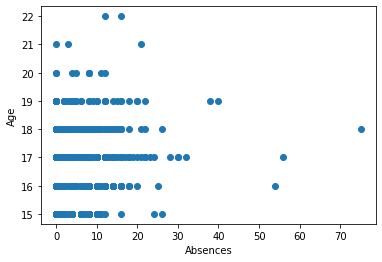

In [30]:
plt.scatter( df['absences'], df['age'])
plt.ylabel('Age')
plt.xlabel('Absences')
plt.show()

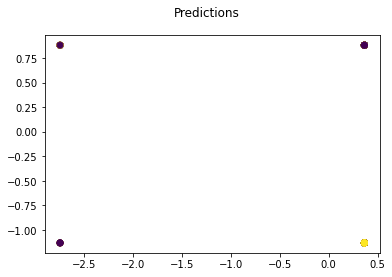

In [31]:
plt.scatter( X_test_scaled[:, 4], X_test_scaled[:, 1], c=y_test)
plt.suptitle('Predictions')
plt.show()


### Predictions
 - The purple dots represent drinkers predictions
 - The yellow dots represent non-drinkers predictions
 
#### The drinker section is on the right hand side and the non-drinker section is on the left hand side
 - The **lone yellow dot** (false drinker prediction) on the right hand side is a **false positive**
 - The **2 purple dots** (false non-drinker prediction) on the left hand side are **false negatives**

<AxesSubplot:>

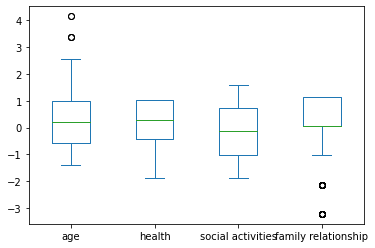

In [32]:
# df[['drinker', 'weekday drinker', 'weekend drinker']].plot.box()
data_df = pd.DataFrame(X_train_scaled, columns=X.columns)
data_df[['age', 'health', 'social activities', 'family relationship']].plot.box()